<a href="https://colab.research.google.com/github/Hruthika100/DS_PY_Writeups_2001610/blob/main/Exp09_notebook_2001610.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Define your Problem statement and ML technique II(two) you propose to use.**

**Ans.** **Problem Statement :**
Develop a machine learning model for predicting the traveller review for a destination mentioned across East Asia.

**ML Technique 2 :**

**Random Forest Regression**

We will build a Random Forest Regression regression model for Bar Crawl dataset. The dataset consists of participant id, time and a sample from each axis of the accelerometer We will predict heavy drinking episodes of the participants

To build a more accurate predictive model, we can use the Random Forest algorithm, which is an ensemble learning technique that combines multiple decision trees with bootstrap aggregating. In Random Forest Regression, multiple decision trees will split the data into smaller subsets, and each split will generate a prediction. The final prediction will be the average of all predicted values, providing more accurate results than the above linear regression model.

**2. Write about working of ML technique II you have proposed**

**Ans.**Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees. 

Random Forest has multiple decision trees as base learning models. We randomly perform row sampling and feature sampling from the dataset forming sample datasets for every model. This part is called Bootstrap.

**1.Design a specific question or data and get the source to determine the required data.**

**2.Make sure the data is in an accessible format else convert it to the required format.**

**3.Specify all noticeable anomalies and missing data points that may be required to achieve the required data.**

**4.Create a machine learning model**

**5.Set the baseline model that you want to achieve**

**6.Train the data machine learning model.**

**7.Provide an insight into the model with test data**

**8.Now compare the performance metrics of both the test data and the predicted data from the model.**

**9.If it doesn’t satisfy your expectations, you can try improving your model accordingly or dating your data, or using another data modeling technique.**

**10.At this stage, you interpret the data you have gained and report accordingly.** 

**3. Pull your chosen data set from experiment 7**

**Ans.**

In [26]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

In [27]:
import pandas as pd
review = pd.read_csv("https://raw.githubusercontent.com/Hruthika100/DS_PY_Writeups_2001610/main/tripadvisor_review.csv")
print('\nNumber of rows and columns in the data set 1: ',review.shape)


Number of rows and columns in the data set 1:  (980, 11)


**4. Do pre-processing as per requirements of ML technique I**

**Ans.**

In [28]:
print(review.describe())


       Art Galleries  Dance Clubs  Juice Bars  Restaurants     Museums  \
count     980.000000   980.000000  980.000000   980.000000  980.000000   
mean        0.893194     1.352612    1.013306     0.532500    0.939735   
std         0.326912     0.478280    0.788607     0.279731    0.437430   
min         0.340000     0.000000    0.130000     0.150000    0.060000   
25%         0.670000     1.080000    0.270000     0.410000    0.640000   
50%         0.830000     1.280000    0.820000     0.500000    0.900000   
75%         1.020000     1.560000    1.572500     0.580000    1.200000   
max         3.220000     3.640000    3.620000     3.440000    3.300000   

          Resorts  Picnic Spots     Beaches    Theaters  Religious Institution  
count  980.000000    980.000000  980.000000  980.000000             980.000000  
mean     1.842898      3.180939    2.835061    1.569439               2.799224  
std      0.539538      0.007824    0.137505    0.364629               0.321380  
min      

In [29]:
print('The dataset has {} rows.'.format(len(review)))
print('The dataset has {} columns'.format(review.columns))
print(review.info())

The dataset has 980 rows.
The dataset has Index(['User ID', 'Art Galleries', 'Dance Clubs', 'Juice Bars', 'Restaurants',
       'Museums', 'Resorts', 'Picnic Spots', 'Beaches', 'Theaters',
       'Religious Institution'],
      dtype='object') columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User ID                980 non-null    object 
 1   Art Galleries          980 non-null    float64
 2   Dance Clubs            980 non-null    float64
 3   Juice Bars             980 non-null    float64
 4   Restaurants            980 non-null    float64
 5   Museums                980 non-null    float64
 6   Resorts                980 non-null    float64
 7   Picnic Spots           980 non-null    float64
 8   Beaches                980 non-null    float64
 9   Theaters               980 non-null    float64
 10  Religious Inst

In [30]:
# Finding missing values using isnull() function in pandas library
print(review.isnull().sum())

User ID                  0
Art Galleries            0
Dance Clubs              0
Juice Bars               0
Restaurants              0
Museums                  0
Resorts                  0
Picnic Spots             0
Beaches                  0
Theaters                 0
Religious Institution    0
dtype: int64


<Axes: xlabel='Beaches'>

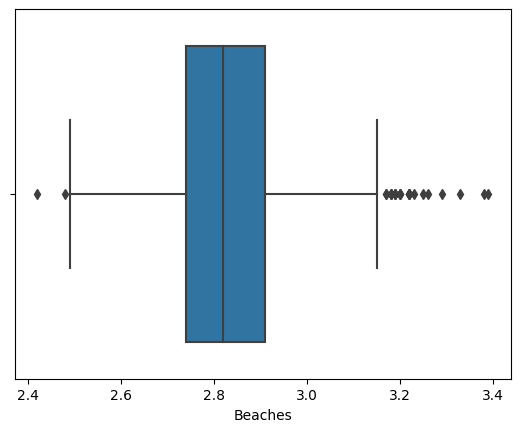

In [31]:
#Finding outliers using boxplot
import seaborn as sns
import pandas as pd
sns.boxplot(x=review['Beaches'])

<ipython-input-32-f9a33e2fb4f4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(review.corr(), annot=True)


<Axes: >

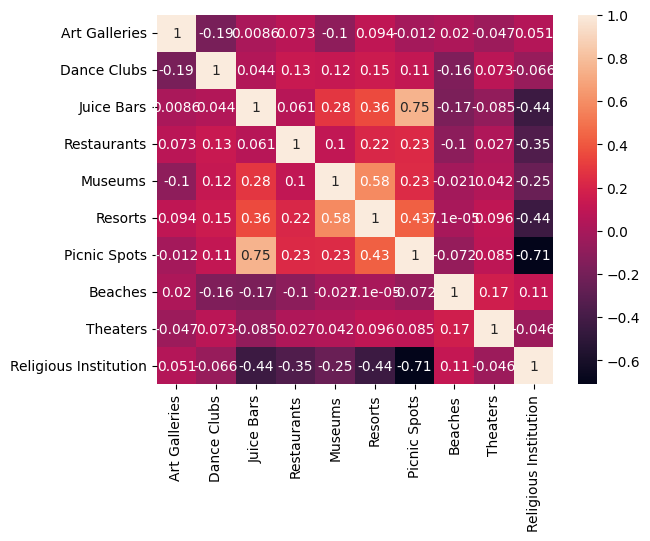

In [32]:
sns.heatmap(review.corr(), annot=True)

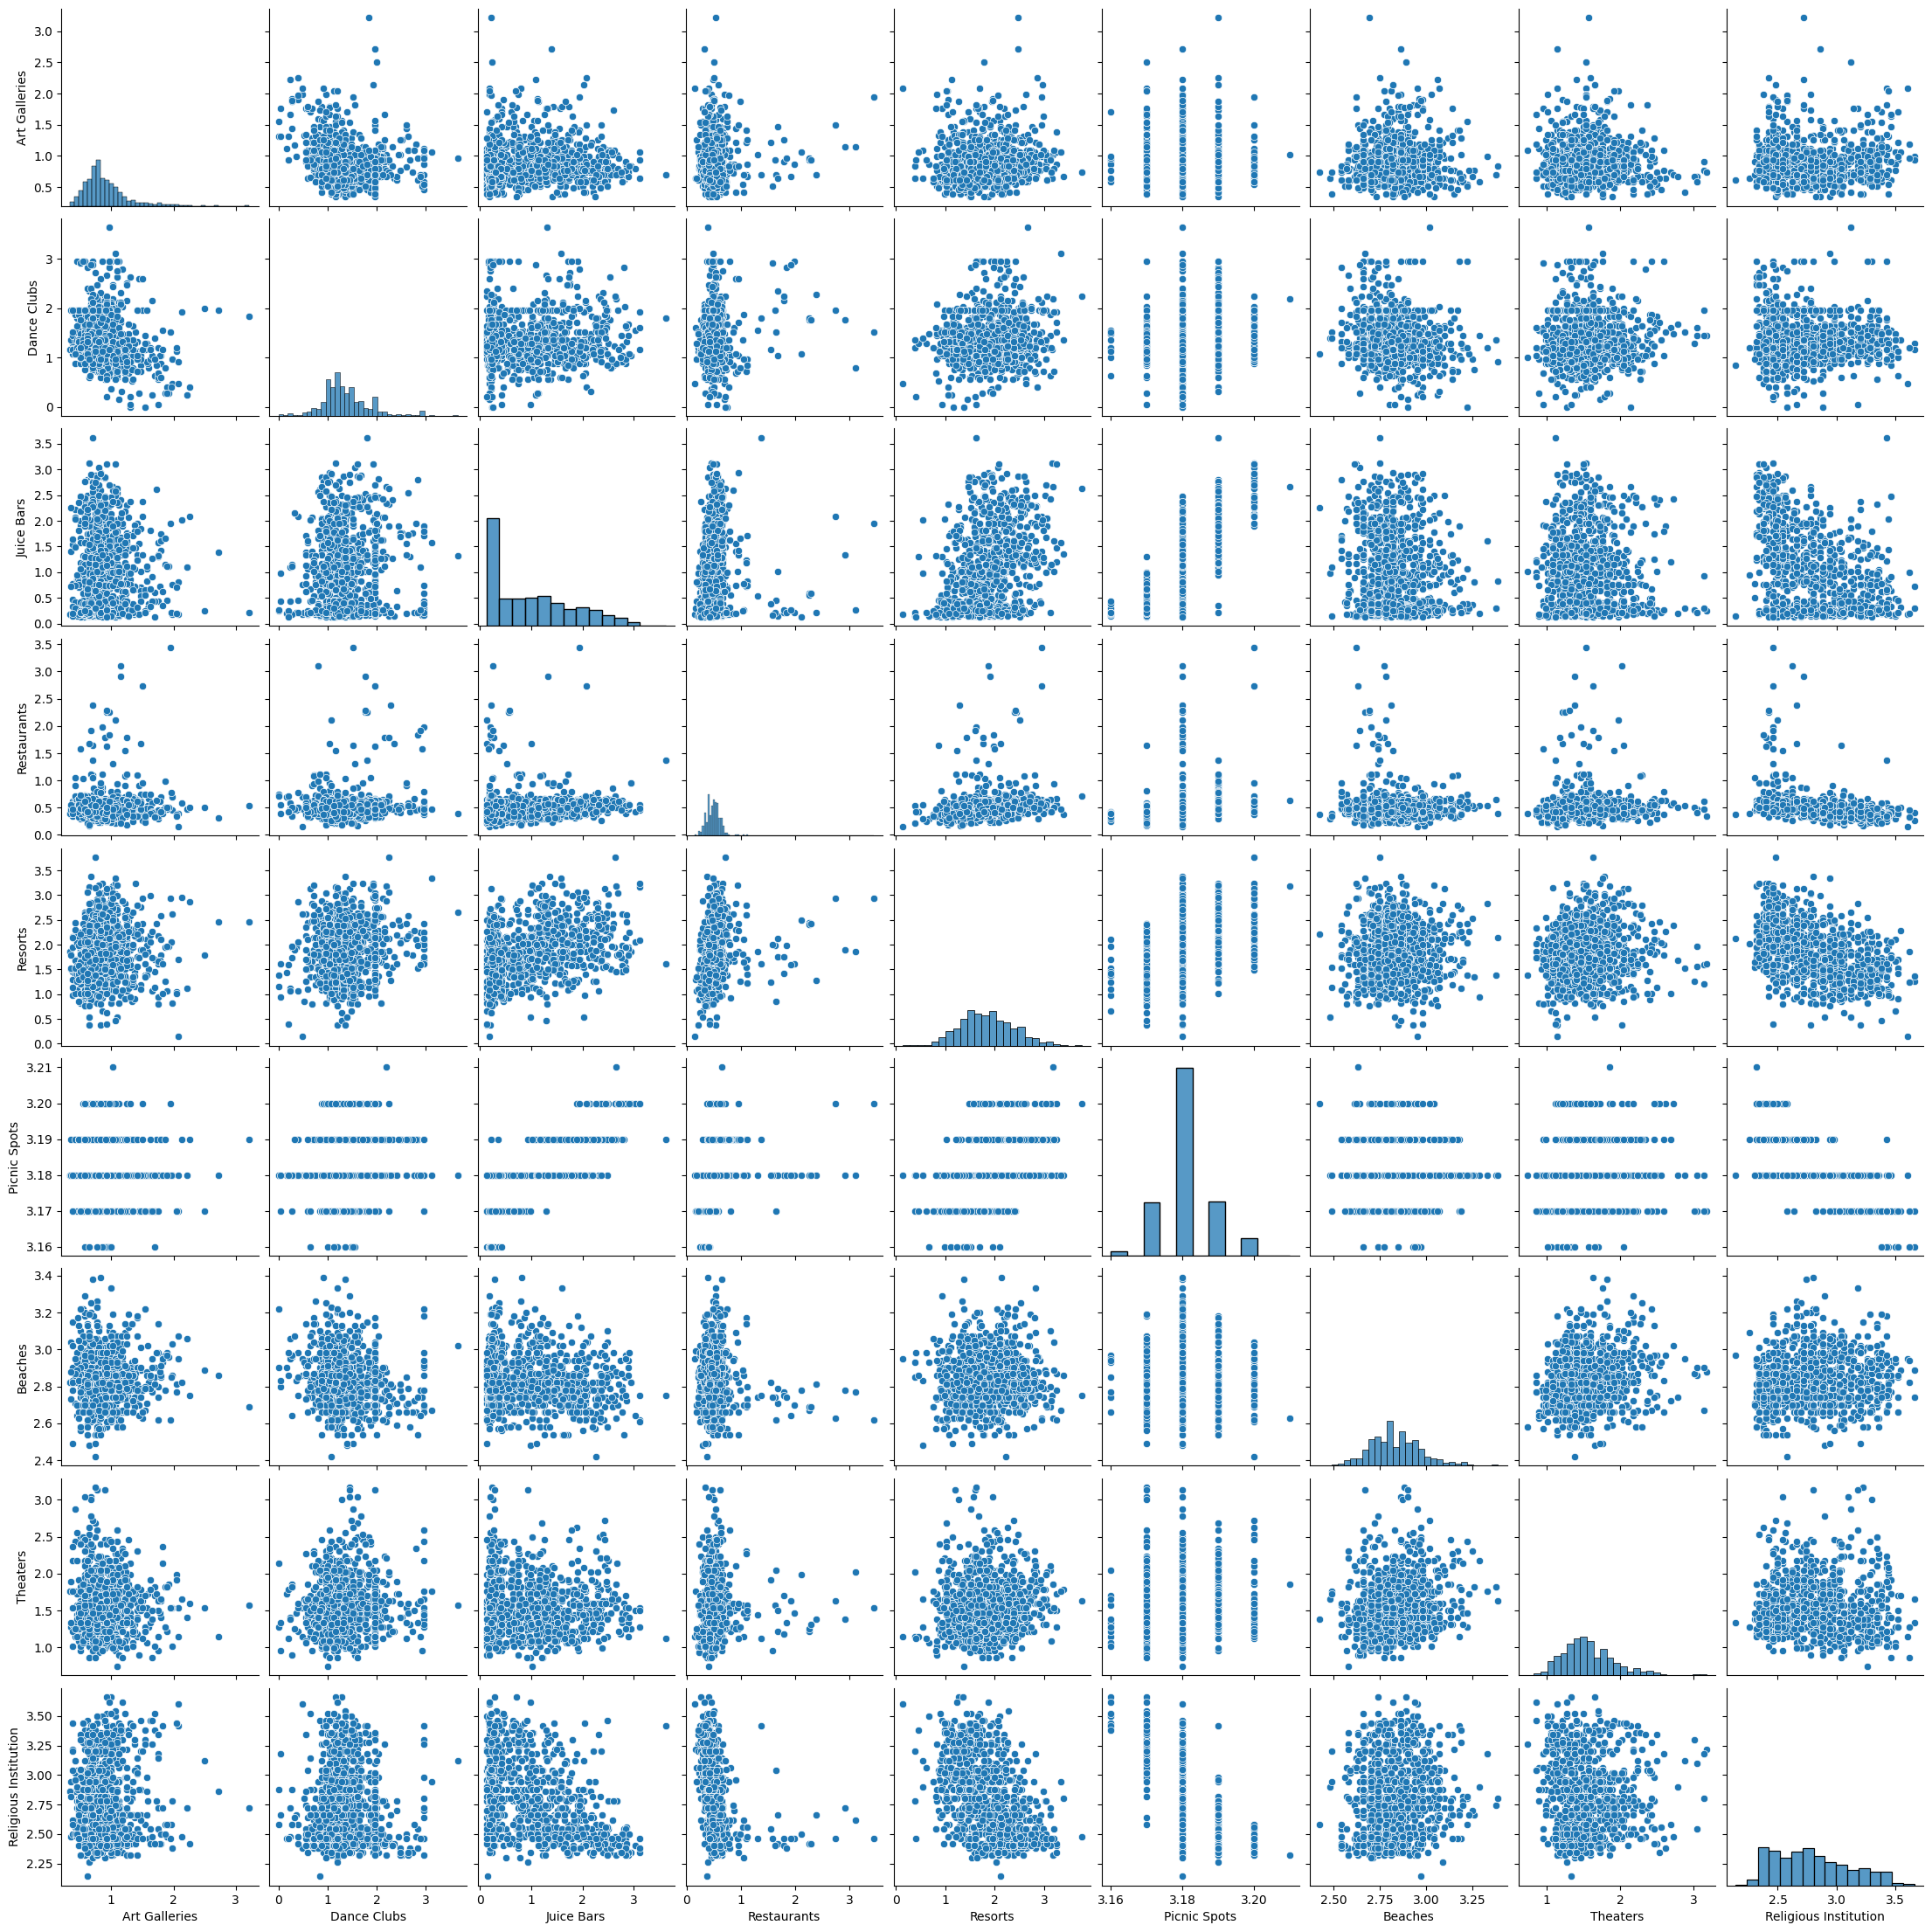

In [33]:
sns.pairplot(review.drop(columns='Museums'))

**5. Divide Data set in to training and validation sets**

**Ans** Splitting the data into training and testing set

In [59]:
X_train, X_test, y_train, y_test = train_test_split(review.drop(columns='User ID'), review['Art Galleries'], test_size=0.2)

In [60]:
X_train.describe()

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Picnic Spots,Beaches,Theaters,Religious Institution
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,0.885140,1.353265,1.013367,0.538418,0.949949,1.851556,3.180918,2.837385,1.564566,2.799413
std,0.317202,0.483101,0.795446,0.293287,0.444065,0.542112,0.007906,0.140136,0.359591,0.323585
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.700000,1.070000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.530000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.820000,3.180000,2.820000,1.500000,2.780000
75%,1.020000,1.560000,1.570000,0.580000,1.205000,2.185000,3.180000,2.930000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


The ranges of all the features are very distinct and should be scaled correctly before making any predictions

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-lev

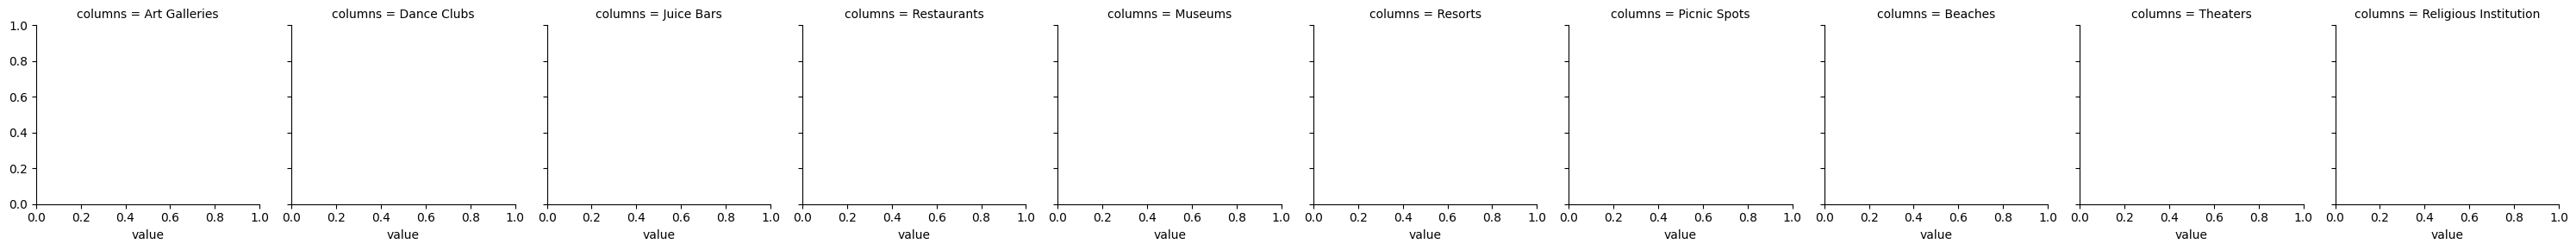

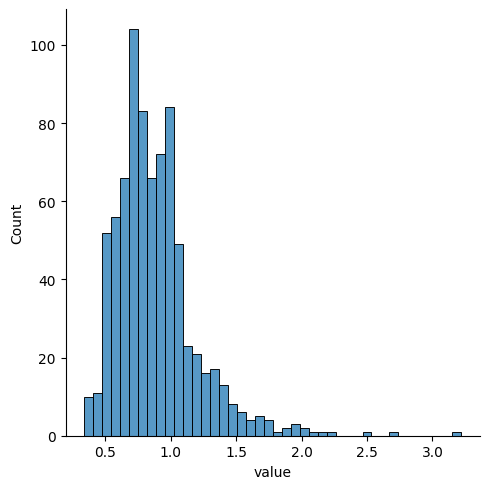

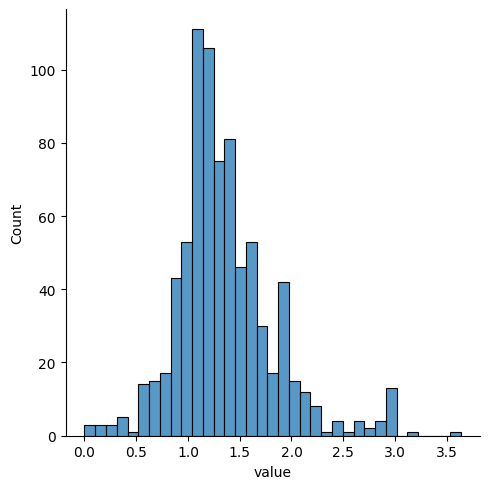

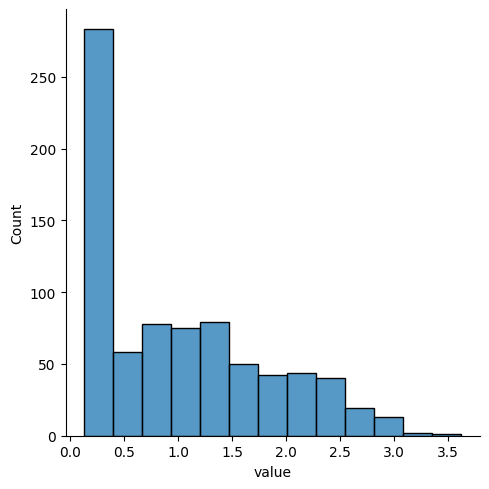

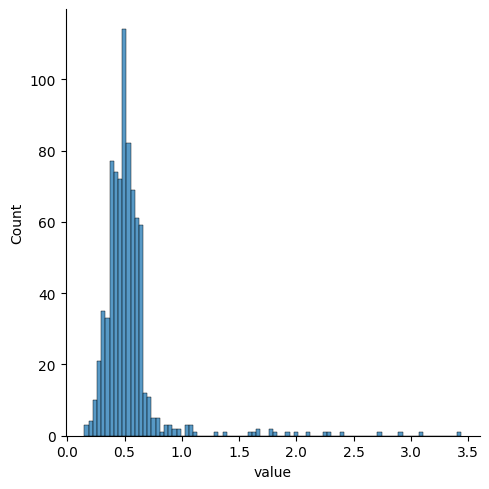

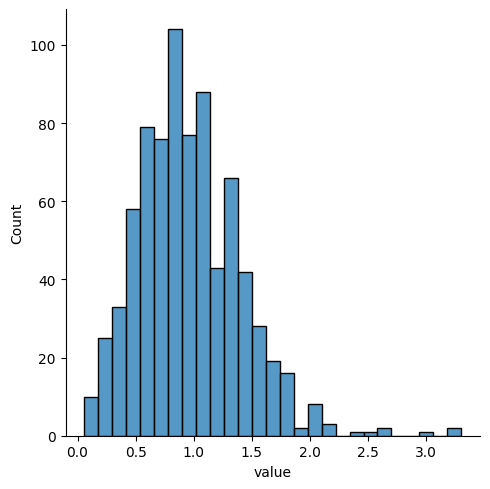

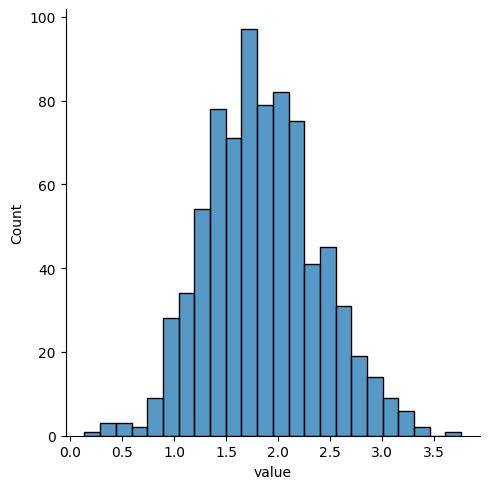

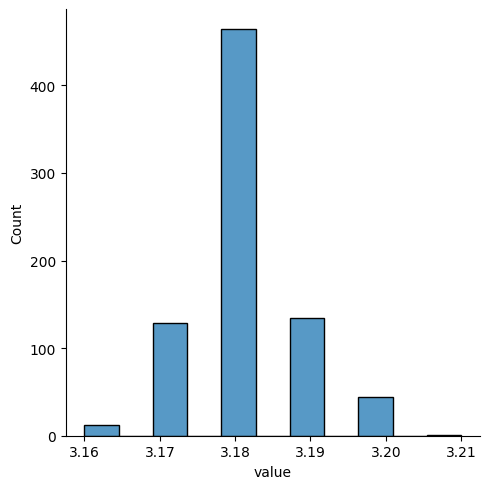

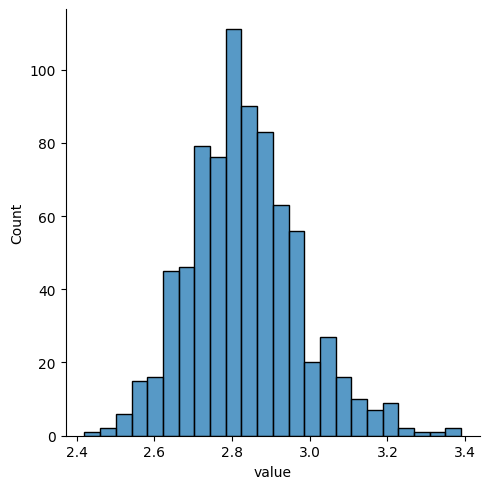

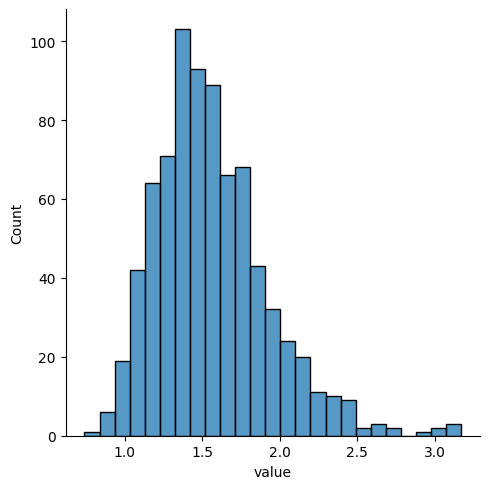

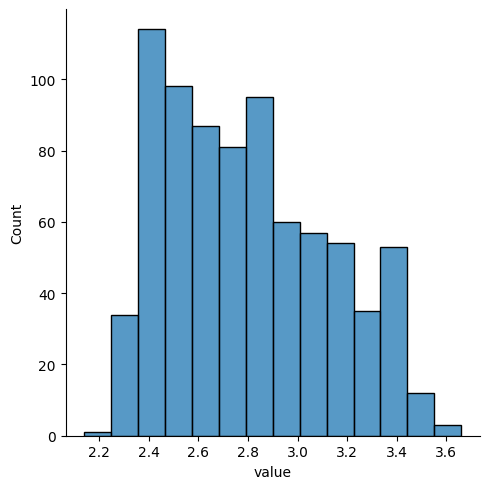

In [61]:
dfm = X_train.melt(var_name='columns')
g = sns.FacetGrid(dfm, col='columns')
g = (g.map(sns.displot, 'value'))

In [42]:
scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_test = pd.DataFrame(X_test_norm, columns=X_test.columns)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-lev

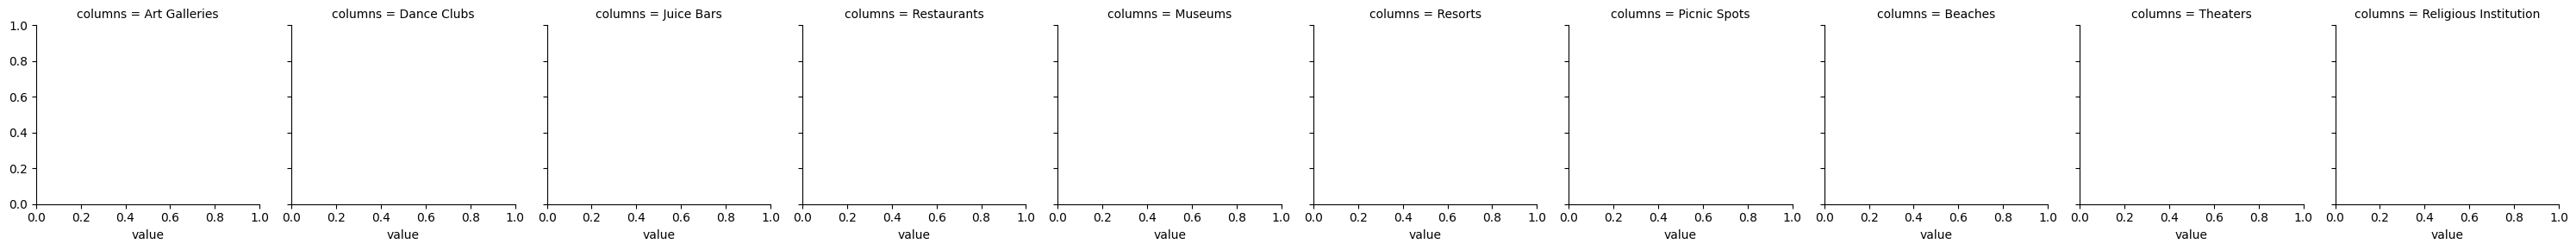

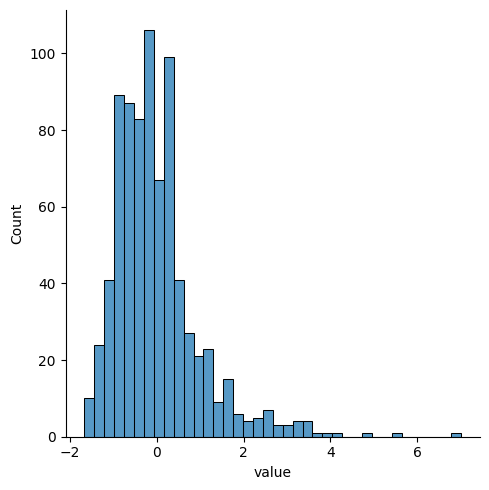

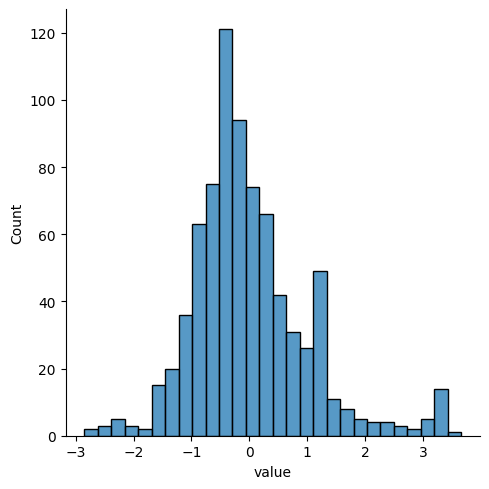

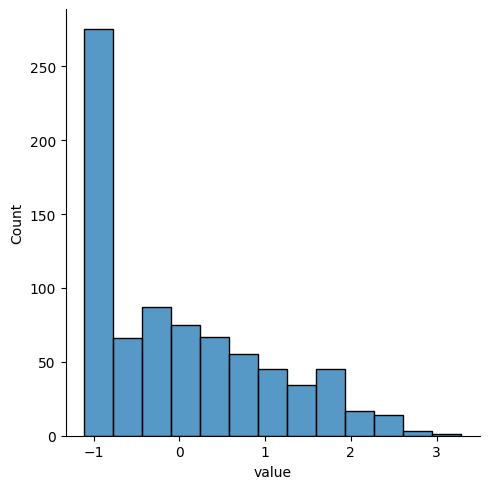

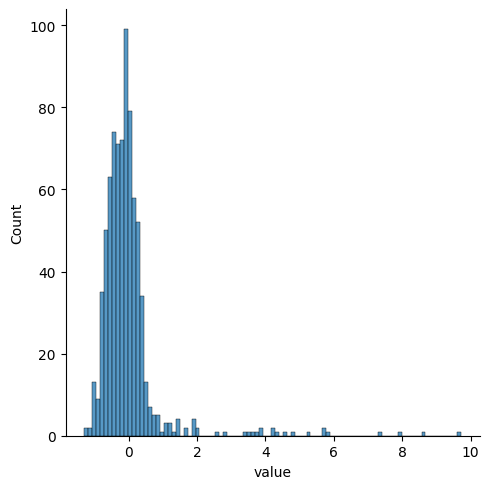

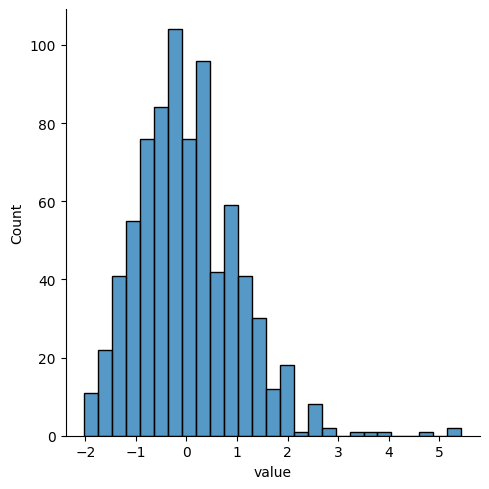

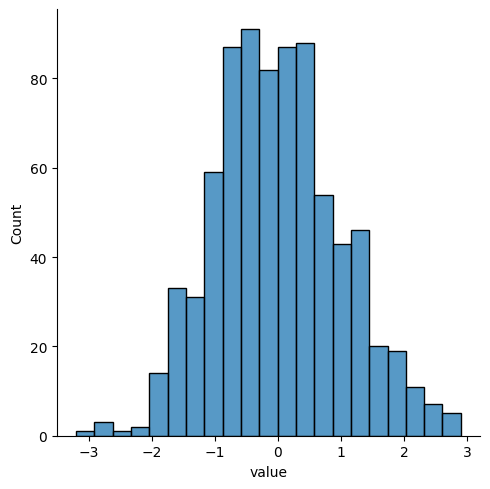

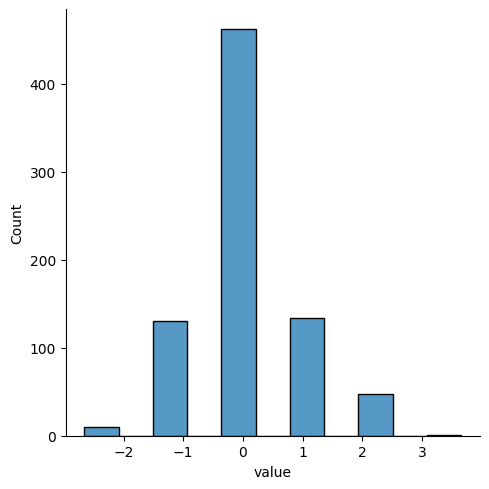

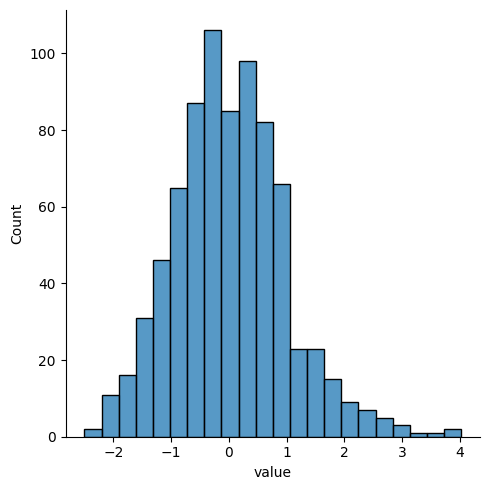

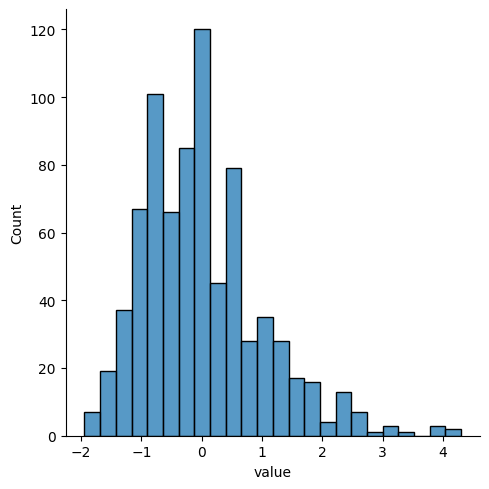

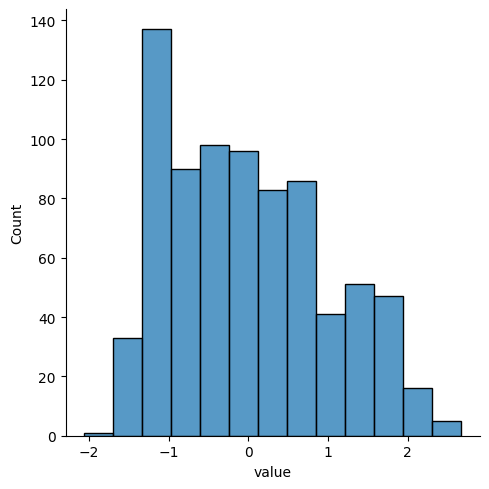

In [43]:
dfm = X_train.melt(var_name='columns')
g = sns.FacetGrid(dfm, col='columns')
g = (g.map(sns.displot, 'value'))

We can see that all the values have 0 mean and have a normal distribution. This enables the model to make better predictions.

**6. Perform training**

**Ans.**
Creating a Grid Search for Random Forest Regressor

In [45]:
gridsearch = GridSearchCV(estimator=RandomForestRegressor(),
                          param_grid={
                              'n_estimators': [50, 100, 250, 300],
                              'max_depth': [None, 100, 200, 300, 400]
                          },
                          cv=3,
                          return_train_score=False,
                          scoring='r2')
gridsearch.fit(X=X_train, y=y_train)
pd.DataFrame(gridsearch.cv_results_).set_index('rank_test_score').sort_index()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,
1,0.246160,0.003430,0.010417,0.000067,400,100,"{'max_depth': 400, 'n_estimators': 100}",0.999705,0.993856,0.977744,0.990435,0.009286
2,0.247719,0.005434,0.010240,0.000058,None,100,"{'max_depth': None, 'n_estimators': 100}",0.999770,0.993058,0.977312,0.990047,0.009412
3,0.247446,0.005816,0.010297,0.000032,100,100,"{'max_depth': 100, 'n_estimators': 100}",0.999556,0.993150,0.976744,0.989817,0.009606
4,0.980966,0.179765,0.040192,0.010224,400,300,"{'max_depth': 400, 'n_estimators': 300}",0.999736,0.992673,0.976578,0.989662,0.009691
5,0.743475,0.011372,0.027489,0.000548,100,300,"{'max_depth': 100, 'n_estimators': 300}",0.999635,0.991918,0.977423,0.989659,0.009208
6,0.618697,0.007748,0.024223,0.001513,300,250,"{'max_depth': 300, 'n_estimators': 250}",0.999584,0.992583,0.976299,0.989489,0.009754
7,0.128113,0.004681,0.006368,0.000210,None,50,"{'max_depth': None, 'n_estimators': 50}",0.999603,0.992465,0.976262,0.989443,0.009765
8,0.619298,0.003522,0.032123,0.006225,200,250,"{'max_depth': 200, 'n_estimators': 250}",0.999804,0.992016,0.976373,0.989398,0.009743
9,0.889206,0.188434,0.034476,0.008613,None,300,"{'max_depth': None, 'n_estimators': 300}",0.999716,0.990359,0.978074,0.989383,0.008862


Creating a pipeline

In [62]:
pipe = make_pipeline(scaler, gridsearch)

This pipeline can be used to deploy this model. It contains the complete model which scales the input data and runs it through the Random Forest to get a prediction.

Testing out the predictions of the pipeline and the model trained above.



**7. Perform Validation**

**Ans**

In [64]:
print('Original model: ' + str(gridsearch.predict(X=scaler.transform(review.drop(columns='User ID').iloc[0].values.reshape(1, -1)))[0]))
print('Pipeline model: ' + str(pipe.predict(X=review.drop(columns='User ID').iloc[0].values.reshape(1, -1))[0]))

Original model: 0.9300000000000019
Pipeline model: 0.9300000000000019


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


The predictions are the same. We can now export the pipeline.

In [65]:
!pip install dill

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
import dill
with open('rf_v1.pkl', 'wb') as f:
    dill.dump(pipe, f)

In [69]:
with open('rf_v1.pkl', 'rb') as f:
    model = dill.load(f)
    print(model.predict(X=review.drop(columns='User ID').iloc[0].values.reshape(1, -1))[0])

0.9300000000000019


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


**8. Report Accuracy of your trained ML Model**

**Ans.** **Predictions are the same of the trained model.** 

**We can see that the model is exported correctly and when imported, gives the same prediction for the same data.**